## Prepare the spatial data
For developing the algorithm of continuou urbano-rural we'll use a piece of the actual data. By doing so, we can reduce the amount of time use to operate and develop the first alghorithm version.

To this aim, we've decied to use only the data from Cajamarca Region, a Peruvian's region located in the north of the country. To clip the raster we need to use the geometry of the shape of Cajamarca so first at all we're going to open the spatial data from Cajamarca Region for clippling the raster of Building density.

In [ ]:
import pandas as pd
import geopandas as gpd

import numpy as np

import os
import rasterio as rio ## we open rasterio as rio

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
### Select the path which are located the spatial data. In our case, the data is stored in the cloud service so we use the path
### through the our local directories
path_g=r'G:\.shortcut-targets-by-id\1lo4KTB2LsIKtS4YUkDAhWKPnbZSGVDFI\Publicación - Pre-PNOICP\04. Data\00. Cartografía base'

os.listdir(path_g)  ### show the files allocated in the specified folder

['inei_centros_poblados_2017_edits.shp',
 'inei_centros_poblados_2017_edits.dbf',
 'inei_centros_poblados_2017_edits.shx',
 'inei_centros_poblados_2017_edits.prj',
 'DensidadViviendas.tif.aux.xml',
 'DensidadViviendas.tif',
 'GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_10_10',
 'JRC_GRID_2018',
 'GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0_10_10',
 'Limites distritales VMGT',
 'Limites dep 2017',
 'inei_centros_poblados_2017_edits.qix']

The spatial data of Peruvian region is stored in the folder "Limites dep 2017" in the 

<AxesSubplot:>

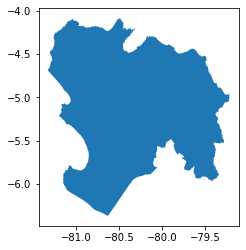

In [ ]:
### Read the Peruvian's region using geopandas function read_file
dep=gpd.read_file(path_g+'\\Limites dep 2017\\DEPARTAMENTO.shp')
### Create a sub GeoDataFrame only with Cajamarca geometry
dep_0=dep[dep.IDDPTO=="20"].copy()
### show a plot of Cajamarca Region
dep_0.plot()

#### Clip the Raster
Using the polygon of Cajamarca, we're going to clip the raster of Building Density in order to only work with a smaller amount of data. To make this operation we have to be sure that both are in the same Coordinate Reference system (CRS)

In [ ]:
### print the CRS of Cajamarca Region
print("The CRS of the Polygon for Cajamarca Region is:{}".format(dep_0.crs))
print("The CRS of the points for Cajamarca's ccpp is:{}".format(ccpp_0.crs))

The CRS of the Polygon for Cajamarca Region is:epsg:4326


We've already know that the raster is projected on "EPSG:32718", so we must reproject the polygon of Cajamarca to the same coordinate reference system

The CRS of the Polygon for Cajamarca Region is:EPSG:32718


<AxesSubplot:>

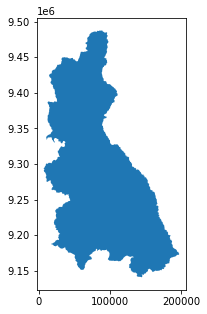

In [ ]:
dep_0=dep_0.to_crs("EPSG:32718")
print("The CRS of the Polygon for Cajamarca Region is:{}".format(dep_0.crs))


In [ ]:
with rxr.open_rasterio(path_b+"\\DensidadViviendas.tif", masked=True) as des_v:
    ## using rasterio function clip and the Cajarmarca's polygon geometry, we create a new raster for Cajamarca Region
    clipped = des_v.rio.clip(dep_0.geometry, dep_0.crs, drop=True, from_disk=True)
    ## save the clipped raster inside the data base folder in the local machine
    clipped.rio.to_raster(r"C:\Users\Guillermo\Desktop/Python/01. Raster/01. Database/caja_dv_clip.tif")

In [ ]:
### Read the Peruvian's ccpp using geopandas' function read_file
ccpp=gpd.read_file(path_g+'\\inei_centros_poblados_2017_edits.shp')
### Create a sub GeoDataFrame only conteiming Cajamarca's ccpp
ccpp_0=ccpp[ccpp.idccpp_17.str[0:2]=="06"][['id','idccpp_17','pob_tot17','geometry']].copy()
### Reproject the shp to EPSG:32718
ccpp_0=ccpp_0.to_crs("EPSG:32718")
### Save the data
ccpp_0.to_file(r"C:\Users\Guillermo\Desktop/Python/01. Raster/01. Database/caja_ccpp_edit.shp")